# Exploratory analysis of PhD's given by US universities: 1958 - 2017

This is just some very basic data cleaning and exploration before making a simple streamlit app, the steps of which you can find detailed [here in blog form](TODO) and [here as code](TODO).

## 0. Setup  

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

## 1. Get data

The data represented below were downloaded on 11/6/20 from [Table 1 here](https://ncses.nsf.gov/pubs/nsf19301/data) as an Excel file; you can find a copy of the original file ("sed17-sr-tab001.xlsx") in the `/assets/xlsx` folder of this directory. 

Let's read it in: 

In [2]:
# Skip first three rows because those just have descriptive information about table
phd_df = pd.read_excel("../assets/xlsx/sed17-sr-tab001.xlsx", skiprows=[0,1,2])

In [3]:
phd_df.head()

,Year,Doctorate recipients,% change from previous year
0,1958,8773,-
1,1959,9213,5
2,1960,9733,5.6
3,1961,10413,7
4,1962,11500,10.4


It's pretty clear that-- at least in the % change column-- some missing values are listed as "-". Since this is a pretty small table, let's just look at the unique values per column and make sure others aren't missing too: 

In [4]:
# look at unique values in each column 
[print(phd_df[c].unique) for c in list(phd_df.columns)]

<bound method Series.unique of 0     1958
1     1959
2     1960
3     1961
4     1962
5     1963
6     1964
7     1965
8     1966
9     1967
10    1968
11    1969
12    1970
13    1971
14    1972
15    1973
16    1974
17    1975
18    1976
19    1977
20    1978
21    1979
22    1980
23    1981
24    1982
25    1983
26    1984
27    1985
28    1986
29    1987
30    1988
31    1989
32    1990
33    1991
34    1992
35    1993
36    1994
37    1995
38    1996
39    1997
40    1998
41    1999
42    2000
43    2001
44    2002
45    2003
46    2004
47    2005
48    2006
49    2007
50    2008
51    2009
52    2010
53    2011
54    2012
55    2013
56    2014
57    2015
58    2016
59    2017
Name: Year, dtype: int64>
<bound method Series.unique of 0      8773
1      9213
2      9733
3     10413
4     11500
5     12728
6     14325
7     16340
8     17949
9     20403
10    22937
11    25743
12    29498
13    31867
14    33041
15    33755
16    33047
17    32952
18    32946
19    31716
20    30875


[None, None, None]

Seems like the last column has both `-` and `*` values. Just to double check, what rows do these correspond to? 

In [5]:
phd_df[phd_df["% change from previous year"].isin(["*", "-"])]

,Year,Doctorate recipients,% change from previous year
0,1958,8773,-
18,1976,32946,*


If we look back at the [website](https://ncses.nsf.gov/pubs/nsf19301/data), we see that `-` is the first value and should be `NaN`, but `*` means the values is < 0.05. Since the `*` here is indicative that the value is considered negligible, let's set this `*` value to 0.  

In [6]:
phd_df = phd_df.replace({"*": 0, "-": np.nan})

# check
phd_df.iloc[[0,18],:]

,Year,Doctorate recipients,% change from previous year
0,1958,8773,NaN
18,1976,32946,0.0


## 2. Basic exploration & analysis 

To me, it makes sense to start by plotting the data as is. Let's begin by just looking at doctorate recipients over time: 

<AxesSubplot:xlabel='Year'>

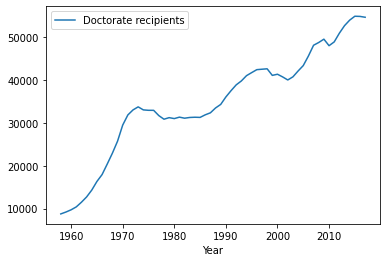

In [7]:
phd_df.plot.line(x="Year", y="Doctorate recipients")

It's clearly grown considerably over time. Has % change also increased? 

<AxesSubplot:xlabel='Year'>

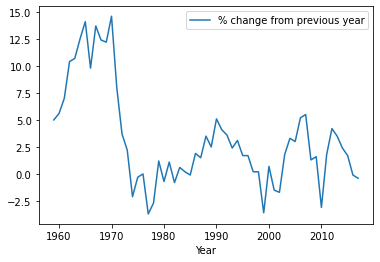

In [8]:
phd_df.plot.line(x="Year", y="% change from previous year")

There's definitely a lot more variability here; it almost seems like it might be interesting to look at the average numbers within each decade represented. Let's add a column for decade and do that:

In [9]:
phd_df["decade"] = [int(np.floor(i / 10) * 10) for i in phd_df["Year"]]

In [10]:
(
    phd_df.
    groupby("decade").
    mean()
)

,Year,Doctorate recipients,% change from previous year
decade,,,
1950,1958.5,8993.000,5.00
1960,1964.5,16207.100,10.84
1970,1974.5,32093.500,2.09
1980,1984.5,31947.500,0.97
1990,1994.5,40377.400,1.85
2000,2004.5,44049.400,1.92
2010,2013.5,52375.875,1.25


Consistent with above, we see that the 1960's had the most change in PhDs awarded and the mean by decade is steadily increasing over time. 

Let's write this cleaned data to a file, and continue with making a basic dashboard:

In [11]:
phd_df.to_csv("../assets/tsv/cleaned_US_phds_awarded_by_year.tsv", sep="\t")